In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.animation as anim
from tqdm import tqdm 

In [18]:
def system(r0,t,Iz,I0,theta_0,psi_p,m,g,d):
    phi,psi,theta,theta_p= r0
    
    dtdpsi=psi_p
    dtdphi=(Iz*dtdpsi*(np.cos(theta_0) -np.cos(theta)))/ (I0*np.sin(theta)**2 + Iz*np.cos(theta)**2)
    dtdtheta=theta_p
    dtdtheta2=(dtdphi**2*np.sin(theta)*np.cos(theta)*(I0-Iz) - dtdphi*dtdpsi*Iz*np.sin(theta) + m*g*d*np.sin(theta))/I0
    

    
    return [dtdphi,dtdpsi,dtdtheta,dtdtheta2]

r0=[0,0,np.pi/4,0]
t=np.linspace(0,8,1000)
theta_0=np.pi/4
m=0.1
r=0.1
d=0.3
g=9.81
psi_p=400
I0=(1/4)*m*r**2 + m*d**2
Iz=(1/2)*m*r**2

sol=odeint(system,r0,t,args=(Iz,I0,theta_0,psi_p,m,g,d))

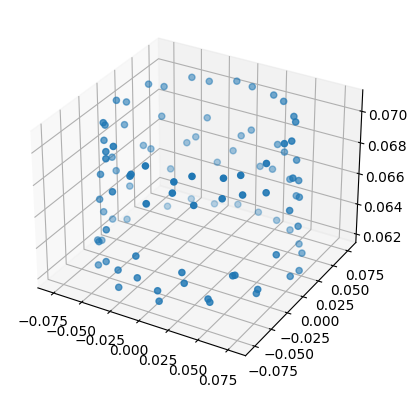

In [19]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
solr=sol[::10]
phi=solr[:,0]
psi=solr[:,1]
theta=solr[:,2]

x=r*np.sin(theta)*np.cos(phi)
y=r*np.sin(theta)*np.sin(phi)
z=r*np.cos(theta)
ax.scatter(x,y,z)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
t1=t[::10]
def init():
    
    ax.set_xlim(-0.08,0.08)
    ax.set_ylim(-0.08,0.08)
    ax.set_zlim(0.06,0.072)
    
def update(j):
    ax.set_title(r't =  %.3f s' %(t1[j]))
    ax.scatter(x[j],y[j],z[j],color='r')
    
Animation = anim.FuncAnimation(fig,update,frames=len(solr),init_func=init)

In [41]:
Animation.save('Precesion.gif', writer='pillow',fps=10)

### Tiempo de precesión del sistema

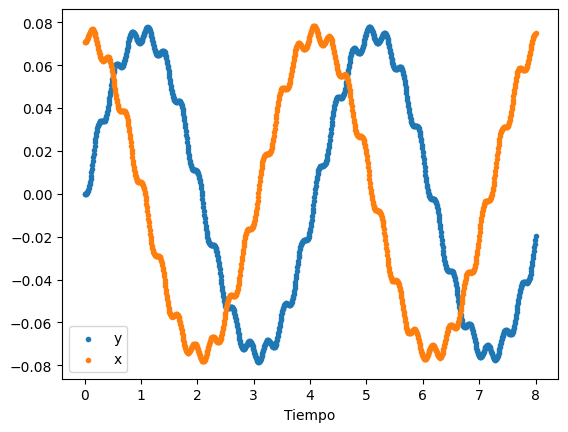

In [72]:
phi=sol[:,0]
psi=sol[:,1]
theta=sol[:,2]

x=r*np.sin(theta)*np.cos(phi)
y=r*np.sin(theta)*np.sin(phi)
plt.scatter(t,y,marker='.',label='y')
plt.scatter(t,x,marker='.',label='x')
plt.xlabel('Tiempo')
plt.legend()


Como se puede ver en la gráfica, el tiempo le toma al eje de rotación volver a al mismo punto(precesión) es alrededor de 4 segundos que es el punto t en el que x,y vuelven a valer lo mismo que en el tiempo t=0.
Para ser mas exactos tenemos:

In [111]:
phic=sol[:,0]

time=0
for i in range(200,len(t)): # Empezamos en 100 ya que de el gif sabemos que el T aprox es 4 seg
    
    if (0.06< x[i] < 0.075) and (-0.01 < y[i] < 0.01):
        time=t[i]
        print('check')
        break

    
print(f'El tiempo aproximado de precesion es :{round(time,3)} segundos')


check
El tiempo aproximado de precesion es :4.132 segundos
